In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import lot data from PLUTO map
# No API, so had to download shapefile
puidata = os.getenv('PUIDATA')
shpfile = puidata + "/mn_pluto/MNMapPLUTO.shp"
bsize = gp.read_file(shpfile)

In [3]:
# Read in the energy usage data from Data of New York
# Use API to access directly from website without download
query = ("https://data.cityofnewyork.us/resource/m46j-75iy.json")
raw_data = pd.read_json(query)
raw_data.shape

(16170, 25)

In [4]:
raw_data.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [5]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [6]:
# Extract columns of interest from energy usage DataFrame
nrg = raw_data[['dof_number_of_buildings', 'dof_property_floor_area_buildngs_and_parking_ft2',
                'energy_star_score', 'nyc_borough_block_and_lot_bbl',
                'reported_property_floor_area_building_s_ft',
                'site_eui_kbtu_ft2', 'street_name', 'zip_code']]
nrg.columns

Index([u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'nyc_borough_block_and_lot_bbl',
       u'reported_property_floor_area_building_s_ft', u'site_eui_kbtu_ft2',
       u'street_name', u'zip_code'],
      dtype='object')

In [7]:
# Extract columns of interest from buildings DataFrame
bldgs = bsize[['BBL', 'LotArea', 'ResArea', 'UnitsRes', 'OfficeArea', 'RetailArea', 'UnitsTotal']]
bldgs.columns

Index([u'BBL', u'LotArea', u'ResArea', u'UnitsRes', u'OfficeArea',
       u'RetailArea', u'UnitsTotal'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f67959650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0f61b37e10>]], dtype=object)

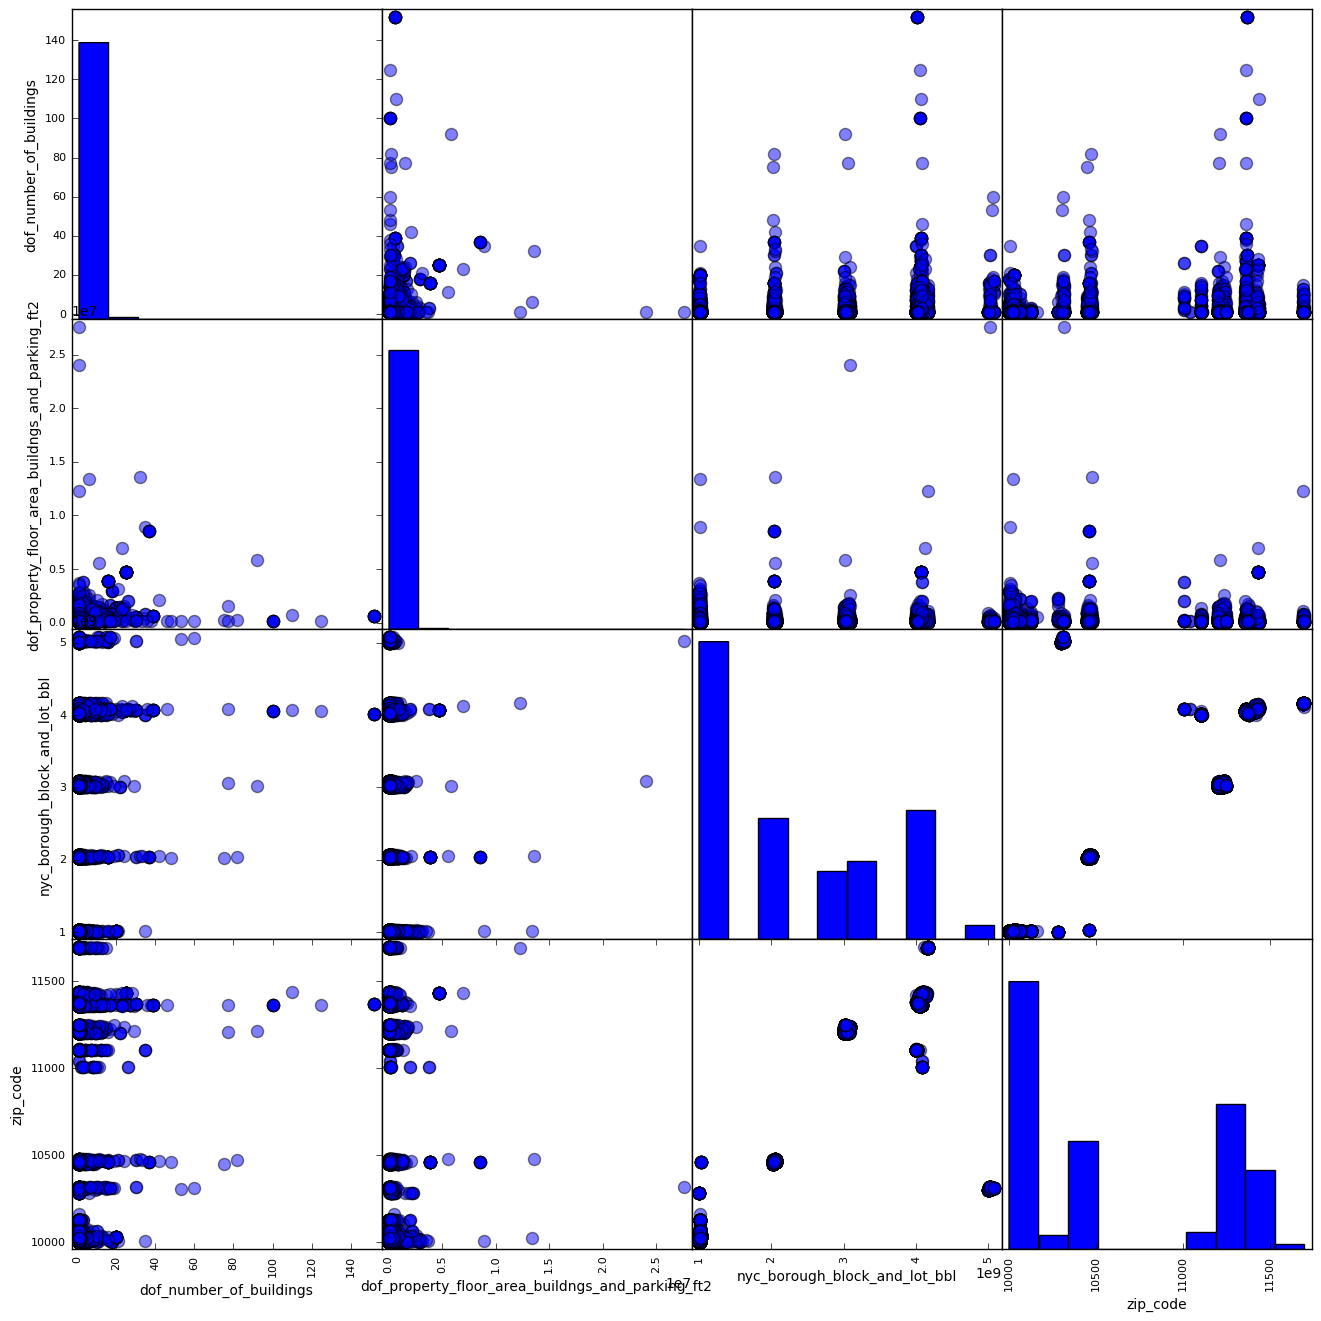

In [8]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(nrg, s=300, figsize=(16, 16))

Scatter plot relating columns in the energy usage DataFrame

In [9]:
# Converts data to float where possible, returns array of True where it succeeds and False otherwise
def canconvert(mydata):
    try:
        float(mydata)
        return True
    except ValueError:
        return False


In [10]:
bldgs.shape

(42697, 7)

In [11]:
bldgs.head(5)

,BBL,LotArea,ResArea,UnitsRes,OfficeArea,RetailArea,UnitsTotal
0,1.015450e+09,2767,9885,16,0,1000,18
1,1.007238e+09,9875,87794,50,0,0,50
2,1.016800e+09,2523,12000,10,0,0,10
3,1.013850e+09,15062,195490,29,8000,0,32
4,1.011970e+09,4087,13839,26,0,0,26


Looking at the data in the Buildings DataFrame

In [12]:
# Convert BBL to string in both DataFrames
blcp = bldgs
blcp.BBL = blcp.BBL.astype(str)
blcp.head(5)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,BBL,LotArea,ResArea,UnitsRes,OfficeArea,RetailArea,UnitsTotal
0,1015450052.0,2767,9885,16,0,1000,18
1,1007237501.0,9875,87794,50,0,0,50
2,1016800048.0,2523,12000,10,0,0,10
3,1013850032.0,15062,195490,29,8000,0,32
4,1011970027.0,4087,13839,26,0,0,26


In [13]:
nrg.nyc_borough_block_and_lot_bbl = nrg.nyc_borough_block_and_lot_bbl.astype(str)
bldgs.BBL = bldgs.BBL.astype(str)

In [14]:
nrg.head(5)

,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,street_name,zip_code
0,NaN,NaN,Not Available,1000410001.0,918919,NaN,NaN,NaN
1,1.0,82730.0,NaN,4021460028.0,#N/A,NaN,108 STREET,11375.0
2,NaN,NaN,Not Available,2027620097.0,64200,NaN,NaN,NaN
3,1.0,440360.0,NaN,1006700001.0,#N/A,NaN,11 AVENUE,10001.0
4,NaN,NaN,Not Available,2048300034.0,50000,NaN,NaN,NaN


Sample of data in the energy DataFrame

In [15]:
# Convert the relevant columns in the energy DataFrame to float, set to NaN where necessary
indx = {}
for fld in ['dof_number_of_buildings',
            'dof_property_floor_area_buildngs_and_parking_ft2',
            'reported_property_floor_area_building_s_ft',
            'energy_star_score', 'site_eui_kbtu_ft2']:
    indx[fld] = (np.vectorize(canconvert)(nrg[fld]))
    print("Invalid entries in " + fld + " changed to NaN %d"%sum(indx[fld]))
    nrg[fld][~indx[fld]] = float("NaN")

Invalid entries in dof_number_of_buildings changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, se

Invalid entries in dof_property_floor_area_buildngs_and_parking_ft2 changed to NaN 16170
Invalid entries in reported_property_floor_area_building_s_ft changed to NaN 13045
Invalid entries in energy_star_score changed to NaN 4412
Invalid entries in site_eui_kbtu_ft2 changed to NaN 15513


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f68ca5990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0f58456590>]], dtype=object)

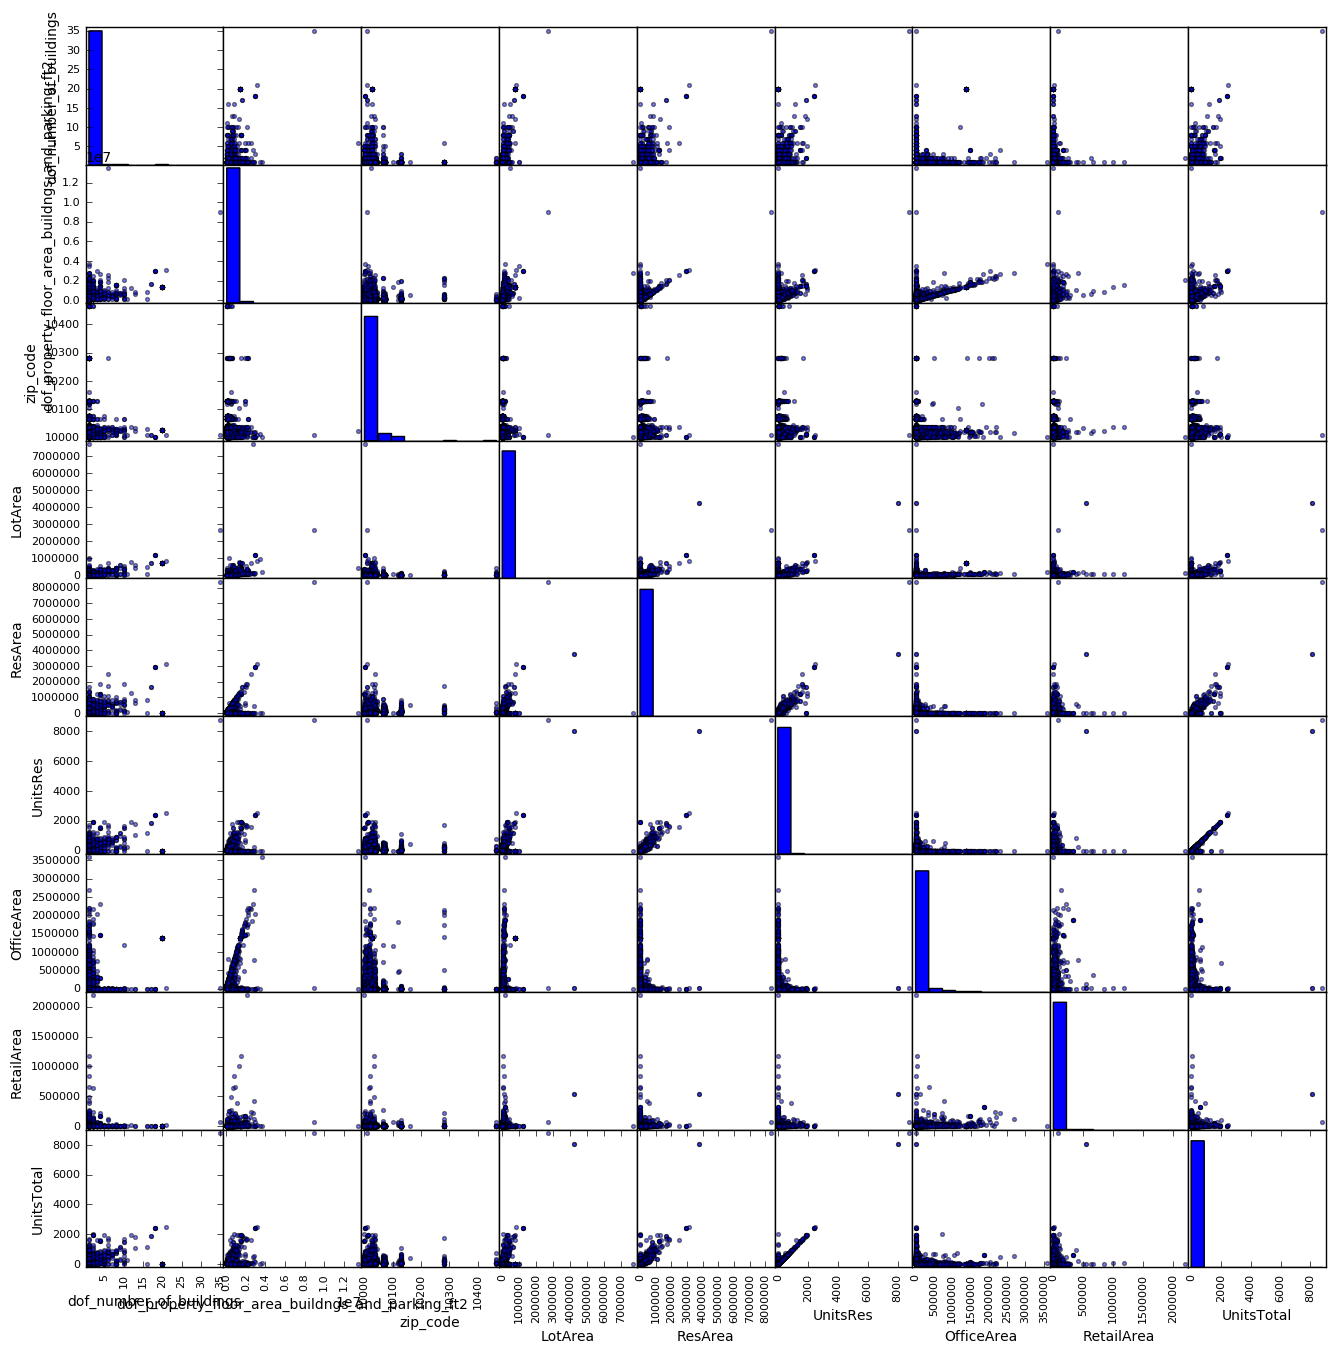

In [16]:
bblnrgdata = pd.merge(nrg, bldgs, left_on="nyc_borough_block_and_lot_bbl", right_on="BBL")

scatter_matrix(bblnrgdata, s=30, figsize=(16, 16))

Scatter plot of columns in the merged DataFrame

In [17]:
bblnrgdata.columns

Index([u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'nyc_borough_block_and_lot_bbl',
       u'reported_property_floor_area_building_s_ft', u'site_eui_kbtu_ft2',
       u'street_name', u'zip_code', u'BBL', u'LotArea', u'ResArea',
       u'UnitsRes', u'OfficeArea', u'RetailArea', u'UnitsTotal'],
      dtype='object')

In [18]:
# Create total energy column. Try two different measures of area, conclude that one of them is worthless
bblnrgdata["TotalEnergy1"] = bblnrgdata["site_eui_kbtu_ft2"].astype(float) * bblnrgdata["reported_property_floor_area_building_s_ft"].astype(float)
bblnrgdata["TotalEnergy2"] = bblnrgdata["site_eui_kbtu_ft2"] * bblnrgdata["LotArea"]
print(bblnrgdata.TotalEnergy1.max())

350145188000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f40b426d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0f408eefd0>]], dtype=object)

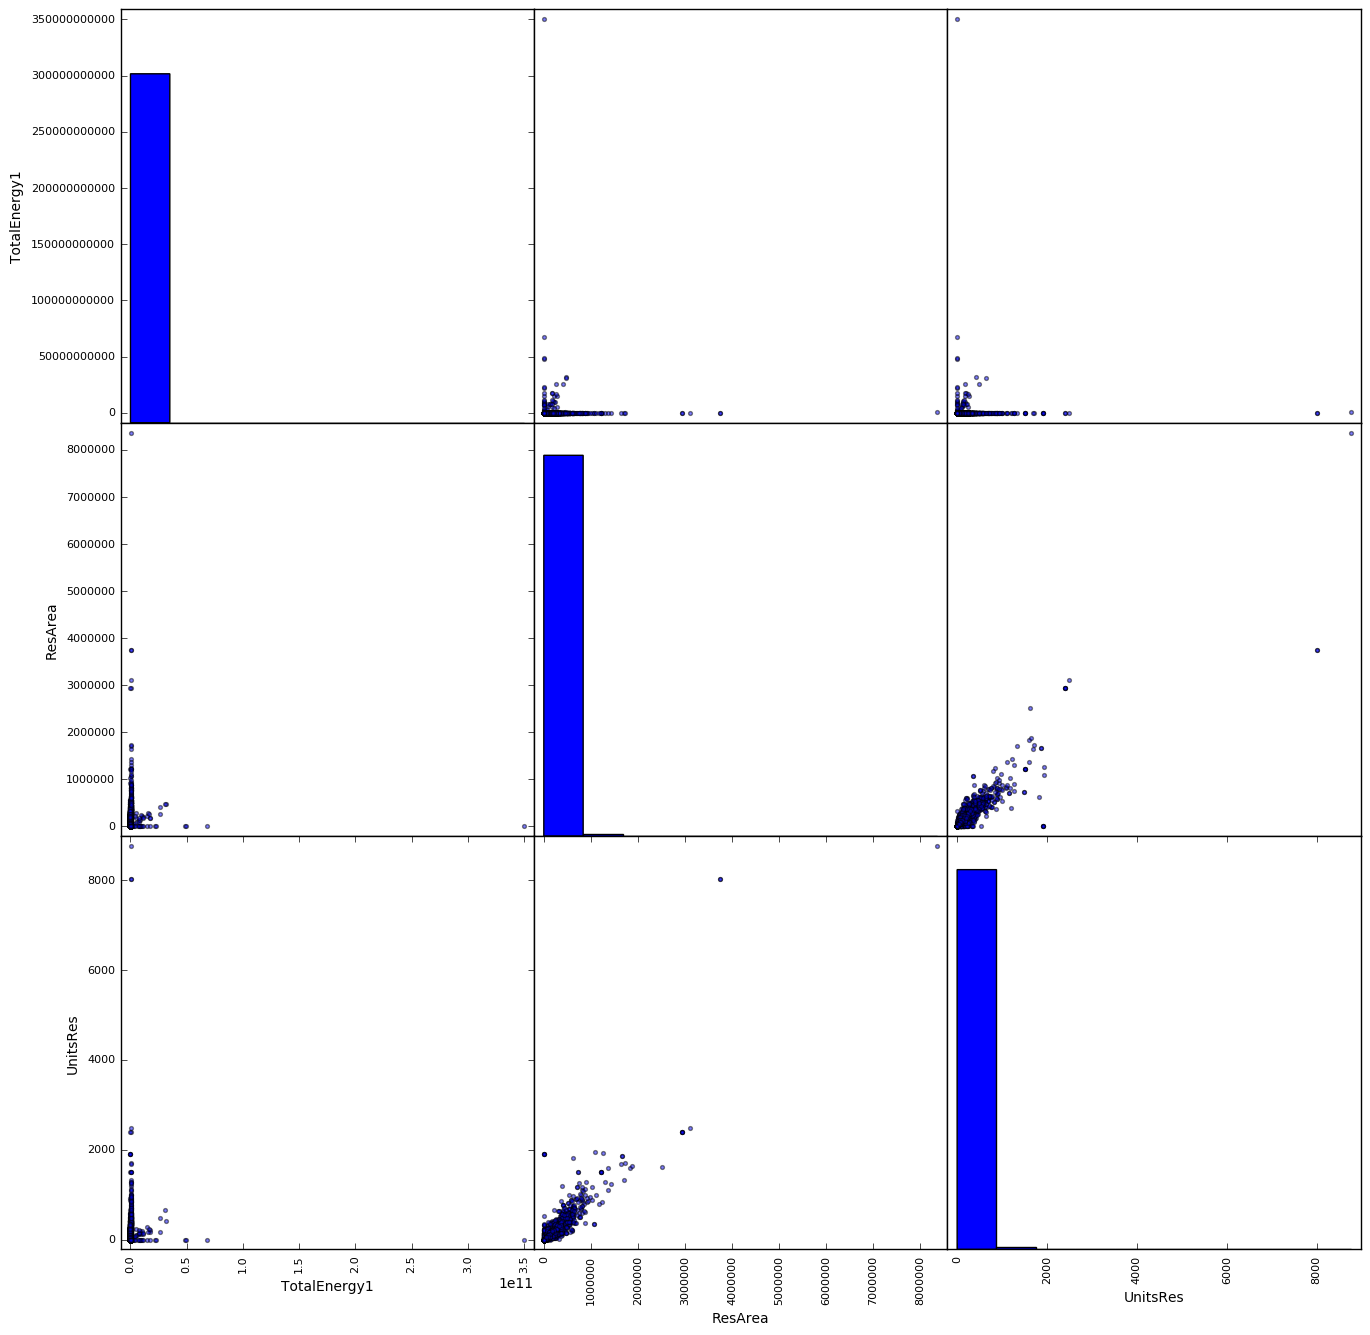

In [19]:
bblnrgres = bblnrgdata[["TotalEnergy1", "ResArea", "UnitsRes"]]
scatter_matrix(bblnrgres, s=30, figsize=(16, 16))

Scatter plot of energy usage and residential space

In [20]:
bblnrgres.head(15)

,TotalEnergy1,ResArea,UnitsRes
0,NaN,0,0
1,NaN,0,0
2,41382000.0,0,0
3,NaN,98260,148
4,NaN,0,0
5,NaN,0,0
6,NaN,1278,2
7,NaN,0,0
8,NaN,0,0
9,NaN,0,0


Table of energy usage and residential area

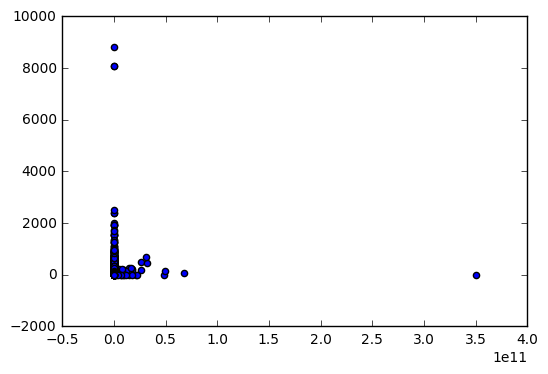

In [21]:
pl.scatter(bblnrgdata.TotalEnergy1, bblnrgdata.UnitsTotal)

Scatter plot of energy usage and total units. Most data concentrated towards the axes.

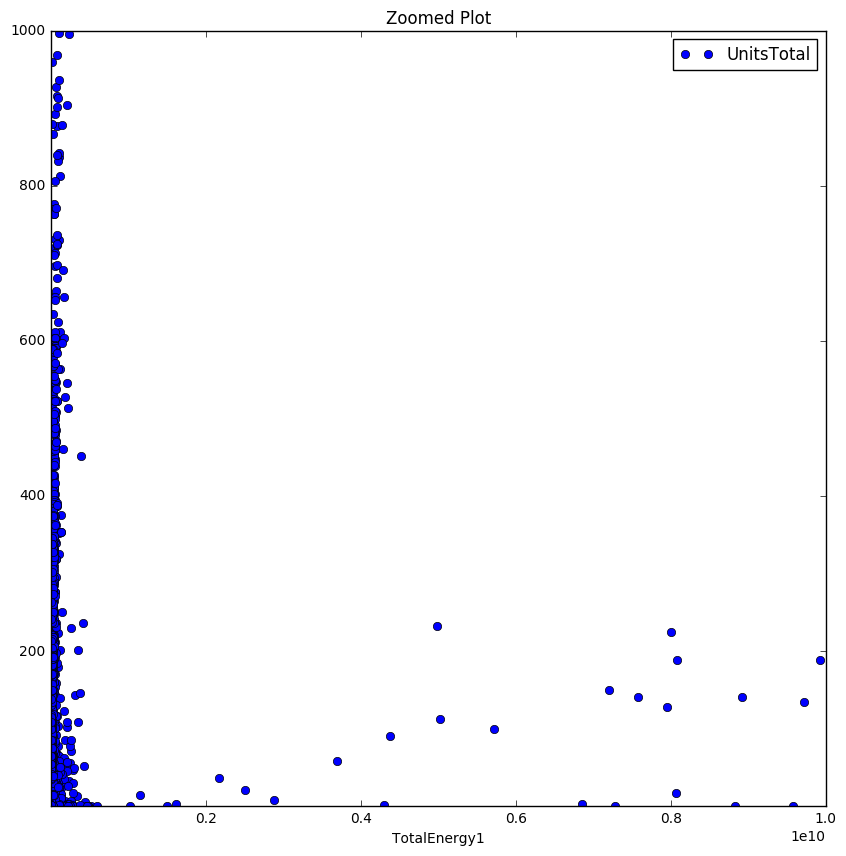

In [22]:
bblnrgdata.plot(x='TotalEnergy1', y='UnitsTotal', style='o', figsize=(10, 10),
                xlim=(100,1e10), ylim=(1,1000), title="Zoomed Plot")

Repeated scatter plot, focusing on area where most of the data reside.

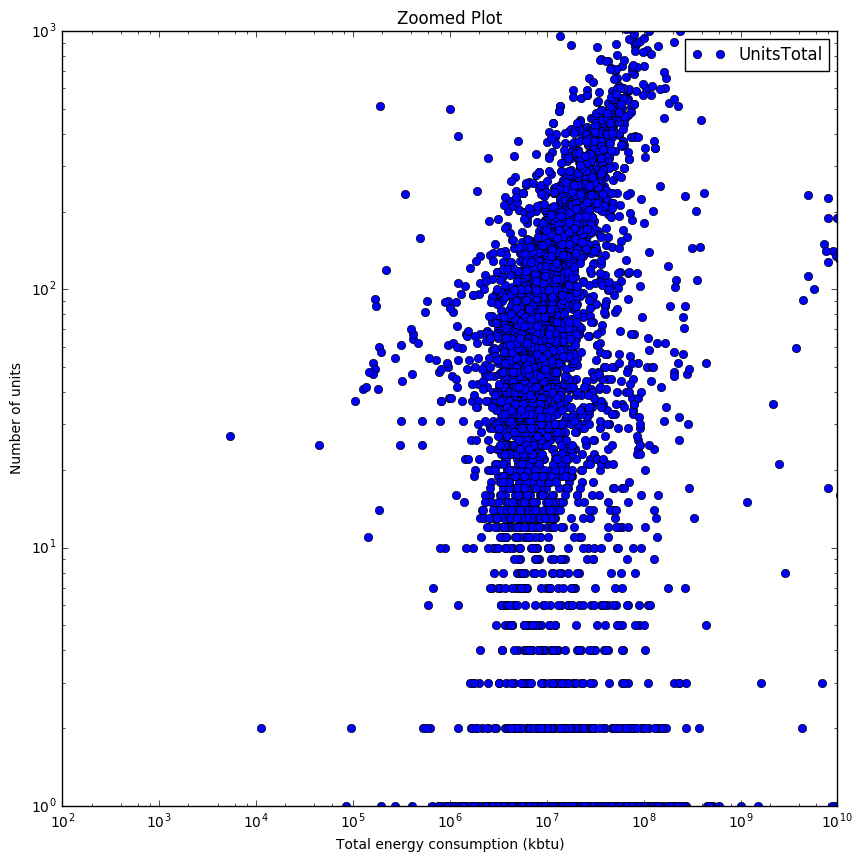

In [23]:
bblplot = bblnrgdata.plot(x='TotalEnergy1', y='UnitsTotal', style='o', figsize=(10, 10),
                          loglog=True, xlim=(100,1e10), ylim=(1,1000), title="Zoomed Plot")
bblplot.set_xlabel("Total energy consumption (kbtu)")
bblplot.set_ylabel("Number of units")

Loglog scatter plot with energy usage on the x-axis

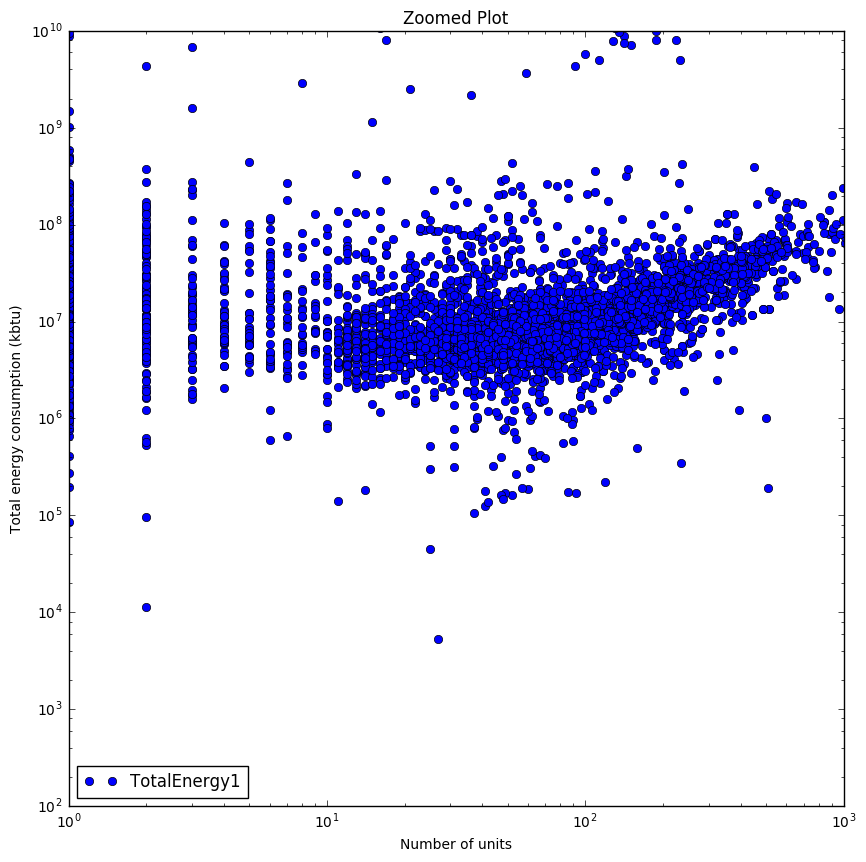

In [24]:
bblplotT = bblnrgdata.plot(y='TotalEnergy1', x='UnitsTotal', style='o', figsize=(10, 10),
                          loglog=True, ylim=(100,1e10), xlim=(1,1000), title="Zoomed Plot")
bblplotT.set_ylabel("Total energy consumption (kbtu)")
bblplotT.set_xlabel("Number of units")

Repeated loglog scatter plot with units on the x-axis

In [25]:
# Filter the data to require at least a minimum number of units and minimum energy consumption
bblnrg_cut = bblnrgdata[(bblnrgdata.TotalEnergy1 > 1000 ) & (bblnrgdata.UnitsTotal > 10)]

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
# Create arrays of logs of the Units and Energy columns
logUnits = np.log10(bblnrg_cut.UnitsTotal)
logEnergy = np.log10(bblnrg_cut.TotalEnergy1)

In [28]:
linmodel = sm.OLS(logEnergy, sm.add_constant(logUnits), missing='drop').fit()
linmodel.params

const         6.086663
UnitsTotal    0.499431
dtype: float64

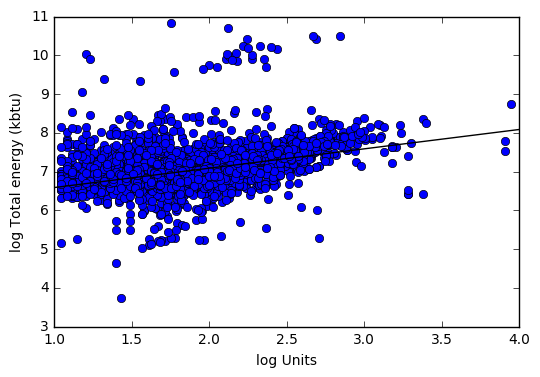

In [29]:
EnergyByUnits = pl.figure()
EUax = EnergyByUnits.add_subplot(111)
EUax.plot(logUnits, logEnergy, 'o')
EByUx = [1., 4.]
EByUy = [linmodel.params[0] + linmodel.params[1] * EByUx[i] for i in range(len(EByUx))]
EUax.plot(EByUx, EByUy, 'k-')
EUax.set_xlabel("log Units")
EUax.set_ylabel("log Total energy (kbtu)")

Scatter plot of log energy consumption by log units with linear trend line

const          -0.565834
TotalEnergy1    0.350481
dtype: float64


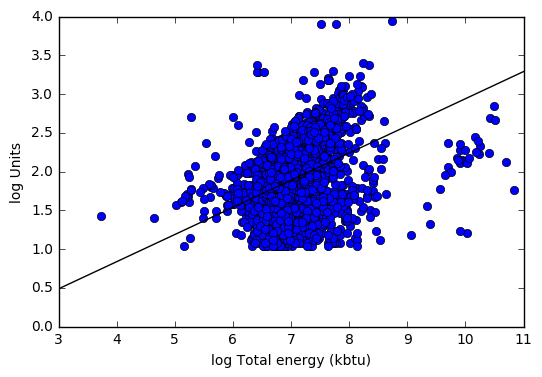

In [32]:
UByEmodel = sm.OLS(logUnits, sm.add_constant(logEnergy), missing='drop').fit()
print(UByEmodel.params)
UnitsByEnergy = pl.figure()
UEax = UnitsByEnergy.add_subplot(111)
UEax.plot(logEnergy, logUnits, 'o')
UByEx = [3., 11.]
UByEy = [UByEmodel.params[0] + UByEmodel.params[1] * UByEx[i] for i in range(len(UByEx))]
UEax.plot(UByEx, UByEy, 'k-')
UEax.set_xlabel("log Total energy (kbtu)")
UEax.set_ylabel("log Units")

Repeated scatter/trend line with energy on x-axis

const         7.429299
UnitsTotal   -0.927823
UnitsSq       0.362637
dtype: float64


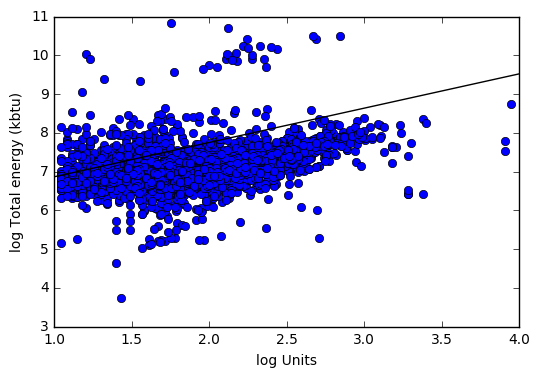

In [33]:
logUnSq = sm.add_constant(logUnits)
logUnSq['UnitsSq'] = logUnSq.UnitsTotal * logUnSq.UnitsTotal
polymodel = sm.OLS(logEnergy, logUnSq, missing='drop').fit()
print(polymodel.params)
PolyEbyU = pl.figure().add_subplot(111)
PolyEbyU.plot(logUnits, logEnergy, 'o')
polyX = [1., 4.]
polyY = [polymodel.params[0] + polymodel.params[1] * polyX[i] + polymodel.params[2] * polyX[i]**2
         for i in range(len(polyX))]
PolyEbyU.plot(polyX, polyY, 'k-')
PolyEbyU.set_xlabel("log Units")
PolyEbyU.set_ylabel('log Total energy (kbtu)')

Scatter plot of log energy consumption against log units with 2-degree polynomial trend line

In [34]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalEnergy1   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     904.7
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          1.99e-180
Time:                        18:41:27   Log-Likelihood:                -2561.7
No. Observations:                4266   AIC:                             5127.
Df Residuals:                    4264   BIC:                             5140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0867      0.032    188.659      0.000         6.023     6.150
UnitsTotal     0.4994      0.017     30.079      0.000         0.467     0.532
==============================================================================
Omnibus:                     2245.418   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45084.375
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      18.384   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary Statistics of the linear model

In [35]:
polymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalEnergy1   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     567.2
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          3.87e-219
Time:                        18:41:29   Log-Likelihood:                -2468.9
No. Observations:                4266   AIC:                             4944.
Df Residuals:                    4263   BIC:                             4963.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.4293      0.102     72.492      0.000         7.228     7.630
UnitsTotal    -0.9278      0.105     -8.844      0.000        -1.134    -0.722
UnitsSq        0.3626      0.026     13.771      0.000         0.311     0.414
==============================================================================
Omnibus:                     2280.521   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55223.028
Skew:                           2.042   Prob(JB):                         0.00
Kurtosis:                      20.146   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary statistics of the quadratic model

In [41]:
predictEnergy = 10**linmodel.params[0] * np.power(bblnrg_cut.UnitsTotal, linmodel.params[1]*np.ones(len(bblnrg_cut.UnitsTotal)))
lin_chivec = (predictEnergy - bblnrg_cut.TotalEnergy1) / np.sqrt(bblnrg_cut.TotalEnergy1)
lin_chi2 = (lin_chivec * lin_chivec).sum()
print("Chi square statistic is {:.2f} with {:d} degrees of freedom".format(lin_chi2, len(lin_chivec) -2))

Chi square statistic is 515390111295.60 with 4264 degrees of freedom


In [45]:
print("LR: {}".format(-2 * (-linmodel.llf + polymodel.llf)))
print("LR from statsmodels: {}".format(polymodel.compare_lr_test(linmodel)))

LR: -185.662275951
LR from statsmodels: (185.66227595136934, 2.8133177246615128e-42, 1.0)


The quadratic model has a lower AIC and lower BIC than the linear model. Also, the chi-square statistice of the difference between the two is large enough to eastablish that adding the extra parameter improves the model.

In [49]:
def residuals(intercept, slope, yvec, xvec, errors):
    resvec = (yvec - (a + xvec * b))**2 / errors**2
    return resvec.sum()

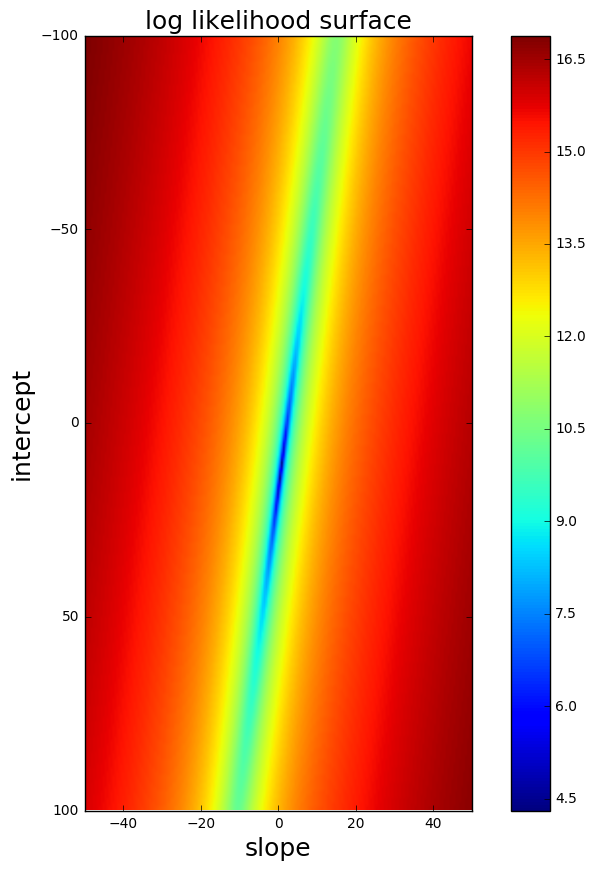

In [51]:
# Calculate likelihood estimation for each value of intercept and slope in the grid
A = np.arange(-50., 50., 0.5)
B = np.arange(-100., 100., 1.)
linerrors = logEnergy / 2 # Energy is poisson with std of sqrt(Energy),
#                           log(Energy) has std of Energy/2
Lsurface = np.zeros((len(A), len(B)))
for i, a in enumerate(A):
    for j, b in enumerate(B):
        # Calculate likelihood estimation for the individual value of (intercept, slope)
        Lsurface[i][j] = np.nansum(residuals(a, b, logEnergy, logUnits, linerrors))
pl.figure(figsize=(10, 10))
pl.title('log likelihood surface', fontsize=18)
pl.imshow(np.log(Lsurface), extent = [-50, 50, 100, -100])
pl.xlabel('slope', fontsize = 18)
pl.ylabel('intercept', fontsize=18)
pl.colorbar()

Likelihood surface plot for the regression